In [1]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Load Test Data

In [3]:
def load_normalize(image_path, normalized=True):
    image = Image.open(image_path).resize([128,128])
    image= np.array(image).astype(np.float32)
    if len(image.shape) == 3:
        image = image.sum(axis=2)
    if normalized:
        return image / 255.0
    else:
        return image

In [4]:
# code to load all the data, assuming dataset is at /workspaces/awesome-ml-group/00_source_data/images/train
emo_types = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emo_inds = np.arange(0, len(emo_types))

In [5]:
# code to load all the data, assuming dataset is at /workspaces/awesome-ml-group/00_source_data/images/train
x_test = []
y_test = []

for emo_ind in emo_inds:
    all_images = glob.glob(os.path.join('/content/gdrive/MyDrive/Expression Dataset/Validation_Relabeled_Cleaned', emo_types[emo_ind],'*.jpg'))
    # x_data += [load_extract_normalize(image_path) for image_path in all_images]
    x_test += [load_normalize(image_path) for image_path in all_images]
    y_test += [emo_ind]*len(all_images)

In [6]:
# adding a fake color channel
x_test = np.array(x_test).reshape(-1, 128, 128, 1)
y_test = np.array(y_test)
y_test_ohc = np.eye(len(emo_types))[y_test]
print(x_test.shape, y_test.shape)

(6488, 128, 128, 1) (6488,)


## Normalization

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def normalization(image):
    return image.astype(np.float32) / 255.0

## Masking

Forehead, eyes, mouth

In [9]:
# import dlib
# import cv2
from numpy import load

## Forehead

In [ ]:
x_data = load('/content/gdrive/MyDrive/Expression Dataset/x_data_forehead_masked.npy')
y_data = load('/content/gdrive/MyDrive/Expression Dataset/y_data_forehead_masked.npy')

angry


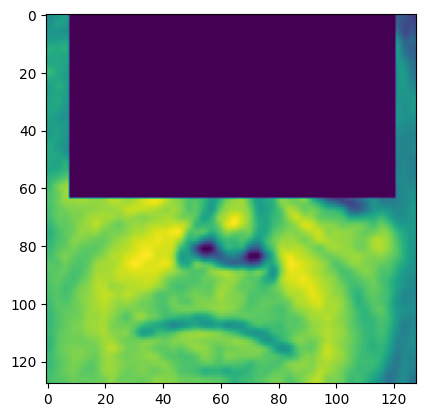

angry


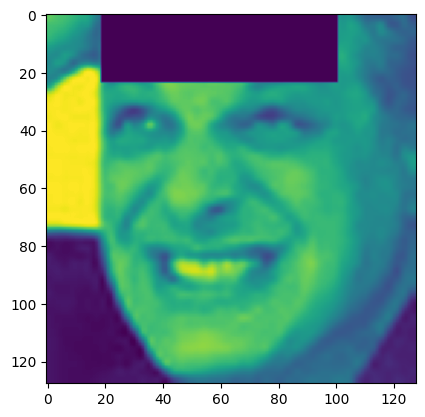

angry


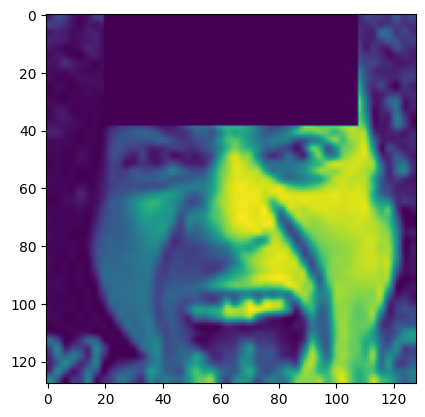

angry


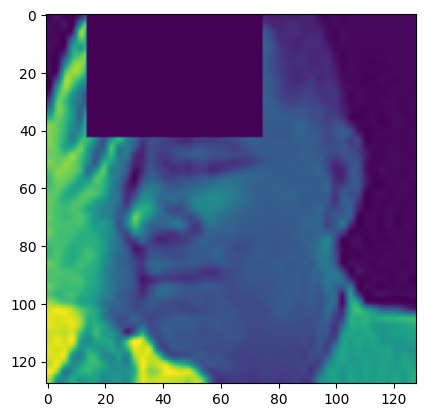

angry


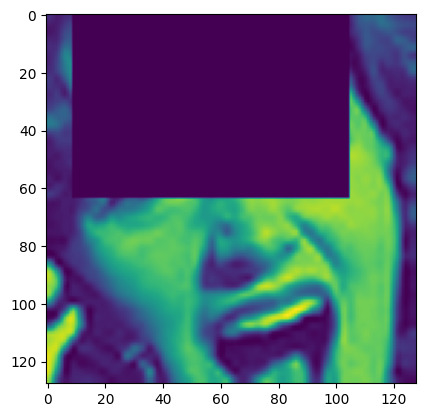

angry


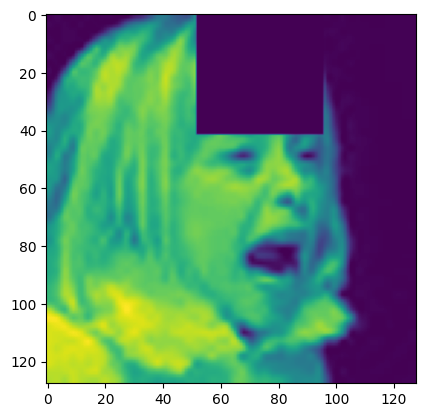

angry


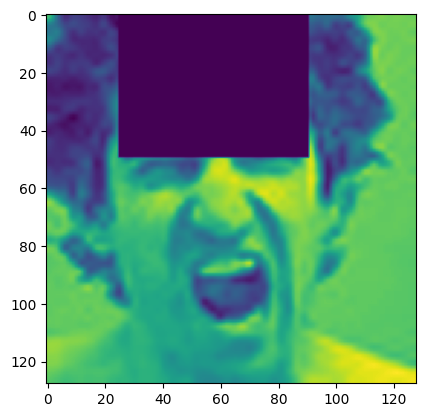

angry


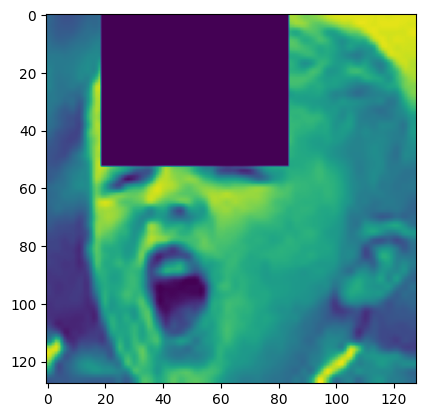

angry


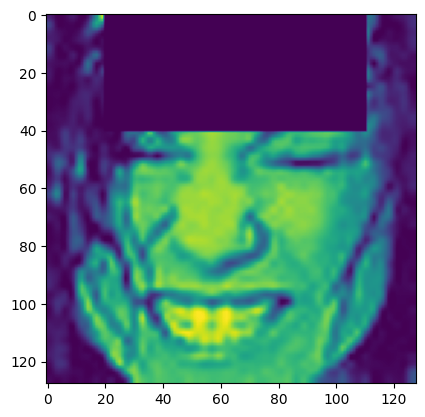

angry


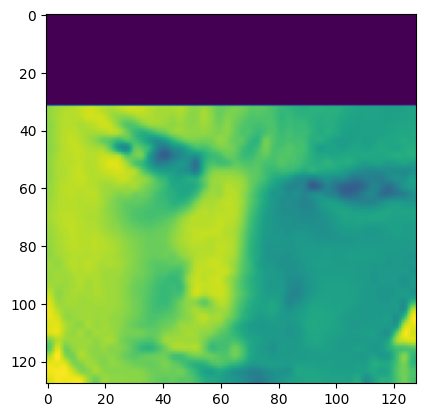

In [ ]:
for i in range(0,10):
    img = x_data[i]
    print(emo_types[y_data[i]])
    plt.imshow(img)
    plt.show()

In [ ]:
x_data = [normalization(img) for img in x_data]

(27546, 128, 128, 1) (27546,)


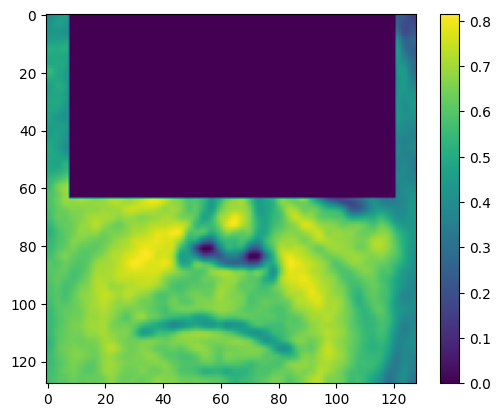

In [ ]:
# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)
y_data_ohc = np.eye(len(emo_types))[y_data]


print(x_data.shape, y_data.shape)
plt.imshow(x_data[0,:,:,0])
plt.colorbar()

In [ ]:
VGG16_model_bn_forehead = tf.keras.models.Sequential([
    
    # Input layer
    tf.keras.layers.Input(x_data[0].shape),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Batch Normalisation layer:
    tf.keras.layers.BatchNormalization(),


    # output layer:
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
VGG16_model_bn_forehead.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 5e-4),  # pick an optimizer and learning rate
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=tf.keras.metrics.CategoricalAccuracy())  # pick a metric to monitor

In [ ]:
n_epoch = 30
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
hist = VGG16_model_bn_forehead.fit(x_data, y_data_ohc,
              epochs=n_epoch,
              batch_size=32,
              validation_data=(x_test, y_test_ohc),
              callbacks=[callback])

Epoch 1/30
861/861 [==============================] - 142s 155ms/step - loss: 1.8709 - categorical_accuracy: 0.2909 - val_loss: 2.5869 - val_categorical_accuracy: 0.3528
Epoch 2/30
861/861 [==============================] - 127s 147ms/step - loss: 1.3901 - categorical_accuracy: 0.4676 - val_loss: 1.4506 - val_categorical_accuracy: 0.4417
Epoch 3/30
861/861 [==============================] - 127s 148ms/step - loss: 1.2445 - categorical_accuracy: 0.5303 - val_loss: 1.2821 - val_categorical_accuracy: 0.5111
Epoch 4/30
861/861 [==============================] - 127s 147ms/step - loss: 1.1624 - categorical_accuracy: 0.5610 - val_loss: 1.2015 - val_categorical_accuracy: 0.5518
Epoch 5/30
861/861 [==============================] - 127s 147ms/step - loss: 1.0825 - categorical_accuracy: 0.5947 - val_loss: 1.4605 - val_categorical_accuracy: 0.4713
Epoch 6/30
861/861 [==============================] - 126s 147ms/step - loss: 1.0699 - categorical_accuracy: 0.5975 - val_loss: 1.1554 - val_categoric

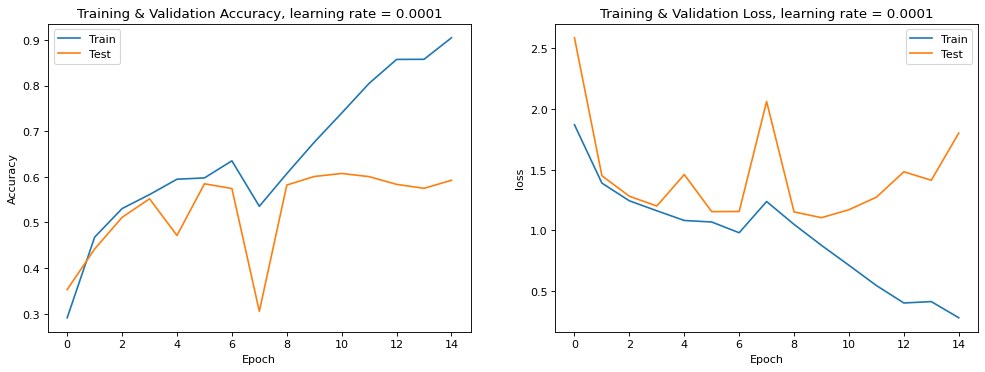

In [ ]:
n_epoch = 15
plt.figure(figsize=(15, 5), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(n_epoch),hist.history.get('categorical_accuracy'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_categorical_accuracy'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Training & Validation Accuracy, learning rate = 0.0001")

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(n_epoch),hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_loss'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(loc='best')
plt.title("Training & Validation Loss, learning rate = 0.0001")
plt.show()

In [ ]:
VGG16_model_bn_forehead.save_weights('/content/gdrive/MyDrive/ML Final project/VGG16_model_bn_forehead')

In [ ]:
VGG16_model_bn_forehead.load_weights('/content/gdrive/MyDrive/ML Final project/VGG16_model_bn_forehead')

## Test Model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [ ]:
# Evaluate the model
# loss, acc = VGG16_model_bn_forehead.evaluate(x_test, y_test, verbose=2)
# print("VGG 16 model, accuracy: {:5.2f}%".format(100 * acc))
y_pred = VGG16_model_bn_forehead.predict(x_test, verbose=2)

203/203 - 8s - 8s/epoch - 39ms/step


In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
print(classification_report(y_test,y_pred,digits = 5))
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

              precision    recall  f1-score   support

           0    0.54891   0.42342   0.47807       888
           1    0.35294   0.21687   0.26866        83
           2    0.55231   0.24782   0.34213       916
           3    0.77431   0.89098   0.82856      1752
           4    0.48183   0.69602   0.56945      1181
           5    0.46583   0.51379   0.48864      1088
           6    0.79714   0.57586   0.66867       580

    accuracy                        0.60065      6488
   macro avg    0.56761   0.50925   0.52059      6488
weighted avg    0.60380   0.60065   0.58629      6488

[0.42342342 0.21686747 0.24781659 0.89098174 0.69602032 0.51378676
 0.57586207]


## Eyes and Eyebrows

In [24]:
x_data = load('/content/gdrive/MyDrive/Expression Dataset/x_data_eye_eybrow_area_masked.npy')
y_data = load('/content/gdrive/MyDrive/Expression Dataset/y_data_forehead_masked.npy')

angry


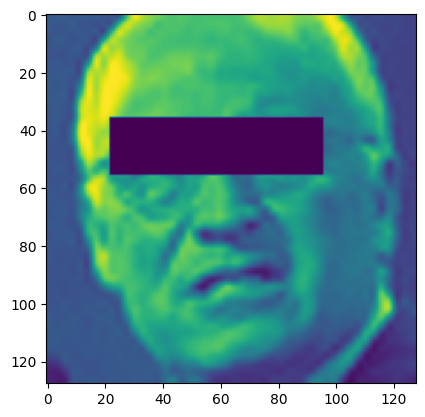

angry


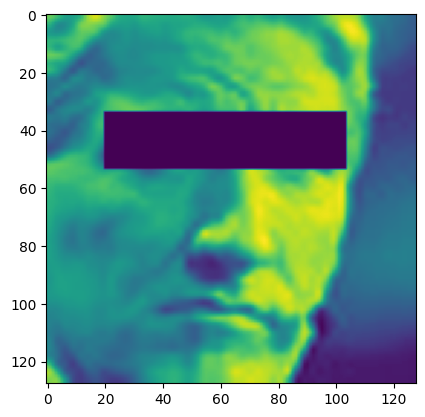

angry


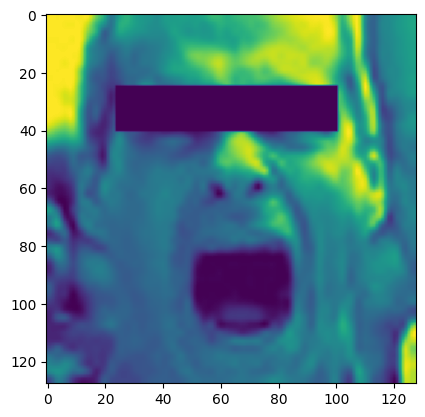

angry


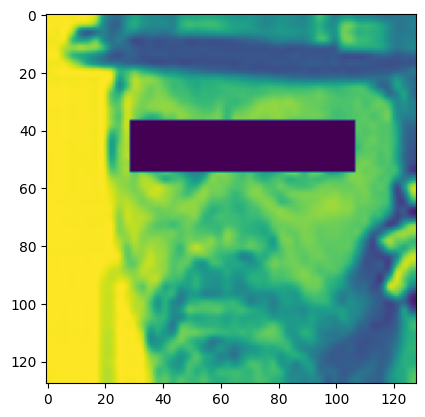

angry


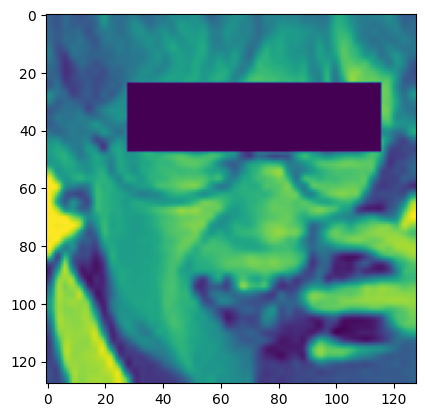

angry


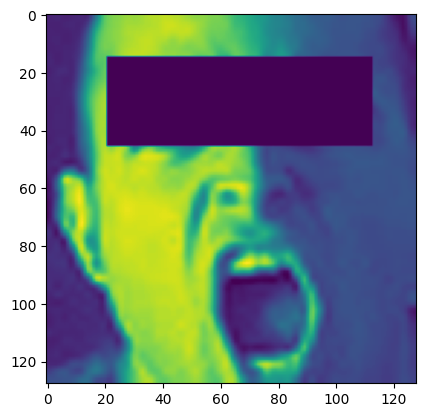

angry


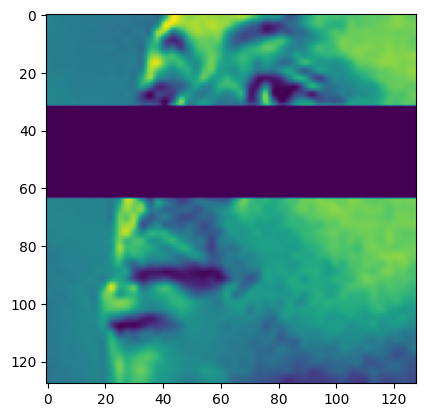

angry


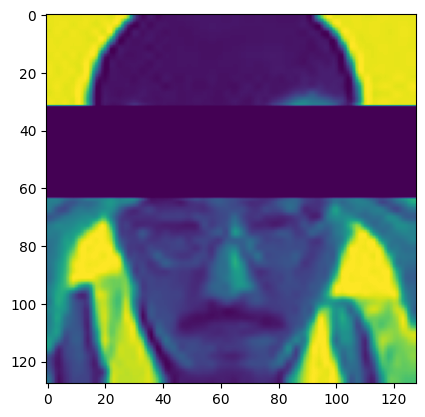

angry


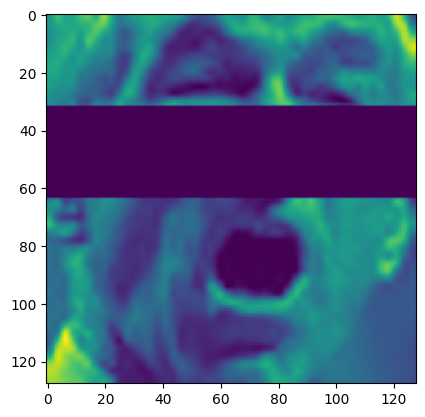

angry


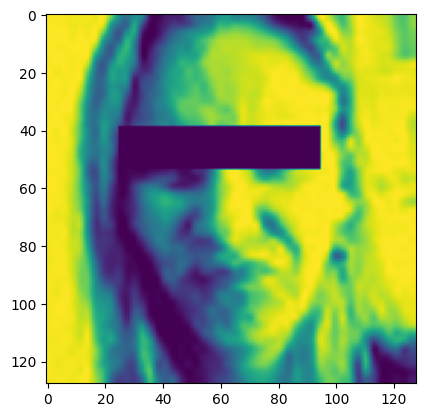

In [25]:
for i in range(0,10):
    img = x_data[i]
    print(emo_types[y_data[i]])
    plt.imshow(img)
    plt.show()

In [26]:
x_data = [normalization(img) for img in x_data]

In [28]:
VGG16_model_bn_eye = tf.keras.models.Sequential([
    
    # Input layer
    tf.keras.layers.Input(x_data[0].shape),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Batch Normalisation layer:
    tf.keras.layers.BatchNormalization(),


    # output layer:
    tf.keras.layers.Dense(7, activation='softmax')
])

In [29]:
VGG16_model_bn_eye.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 5e-4),  # pick an optimizer and learning rate
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=tf.keras.metrics.CategoricalAccuracy())  # pick a metric to monitor

In [30]:
n_epoch = 30
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
hist = VGG16_model_bn_eye.fit(x_data, y_data_ohc,
              epochs=n_epoch,
              batch_size=32,
              validation_data=(x_test, y_test_ohc),
              callbacks=[callback])

Epoch 1/30
861/861 [==============================] - 136s 149ms/step - loss: 1.9612 - categorical_accuracy: 0.2469 - val_loss: 2.8716 - val_categorical_accuracy: 0.2700
Epoch 2/30
861/861 [==============================] - 127s 147ms/step - loss: 1.6387 - categorical_accuracy: 0.3699 - val_loss: 1.6641 - val_categorical_accuracy: 0.2685
Epoch 3/30
861/861 [==============================] - 127s 147ms/step - loss: 1.3731 - categorical_accuracy: 0.4732 - val_loss: 1.4502 - val_categorical_accuracy: 0.4121
Epoch 4/30
861/861 [==============================] - 127s 147ms/step - loss: 1.2776 - categorical_accuracy: 0.5144 - val_loss: 1.4085 - val_categorical_accuracy: 0.4501
Epoch 5/30
861/861 [==============================] - 127s 147ms/step - loss: 1.1928 - categorical_accuracy: 0.5504 - val_loss: 1.2564 - val_categorical_accuracy: 0.5233
Epoch 6/30
861/861 [==============================] - 126s 147ms/step - loss: 1.1202 - categorical_accuracy: 0.5806 - val_loss: 1.2522 - val_categoric

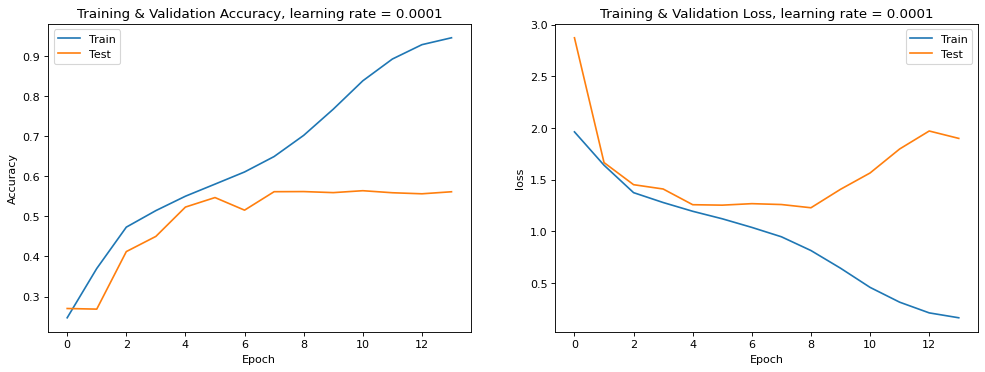

In [31]:
n_epoch = 14
plt.figure(figsize=(15, 5), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(n_epoch),hist.history.get('categorical_accuracy'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_categorical_accuracy'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Training & Validation Accuracy, learning rate = 0.0001")

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(n_epoch),hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_loss'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(loc='best')
plt.title("Training & Validation Loss, learning rate = 0.0001")
plt.show()

In [32]:
VGG16_model_bn_eye.save_weights('/content/gdrive/MyDrive/ML Final project/VGG16_model_bn_eye')

## Test data

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [34]:
# Evaluate the model
# loss, acc = VGG16_model_bn_forehead.evaluate(x_test, y_test, verbose=2)
# print("VGG 16 model, accuracy: {:5.2f}%".format(100 * acc))
y_pred = VGG16_model_bn_eye.predict(x_test, verbose=2)

203/203 - 8s - 8s/epoch - 37ms/step


In [35]:
y_pred = np.argmax(y_pred,axis = 1)
print(classification_report(y_test,y_pred,digits = 5))
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

              precision    recall  f1-score   support

           0    0.35697   0.65203   0.46135       888
           1    0.37255   0.22892   0.28358        83
           2    0.42349   0.29913   0.35061       916
           3    0.81212   0.83390   0.82287      1752
           4    0.56974   0.44962   0.50260      1181
           5    0.46752   0.46967   0.46859      1088
           6    0.78779   0.46724   0.58658       580

    accuracy                        0.56196      6488
   macro avg    0.54145   0.48579   0.49660      6488
weighted avg    0.58525   0.56196   0.56098      6488

[0.65202703 0.22891566 0.29912664 0.83390411 0.44961897 0.46966912
 0.46724138]


## Lower Face Mask

In [10]:
#/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/x_data_bottom_masked.npy
x_data = load('/content/gdrive/MyDrive/Expression Dataset/x_data_bottom_masked.npy')
y_data = load('/content/gdrive/MyDrive/Expression Dataset/y_data_forehead_masked.npy')

angry


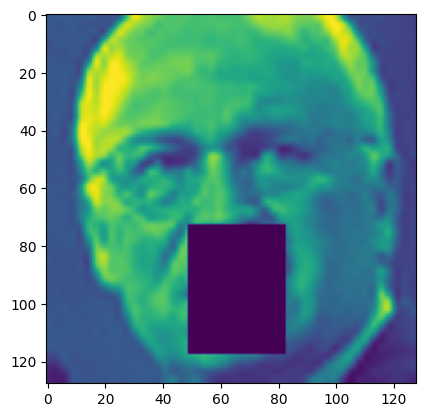

angry


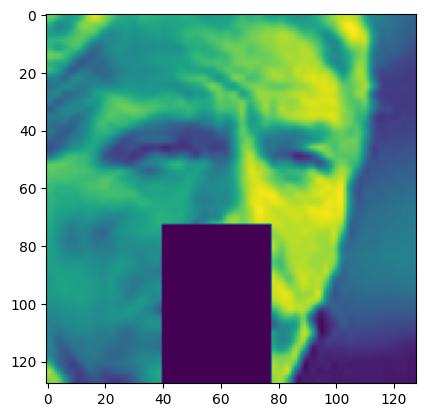

angry


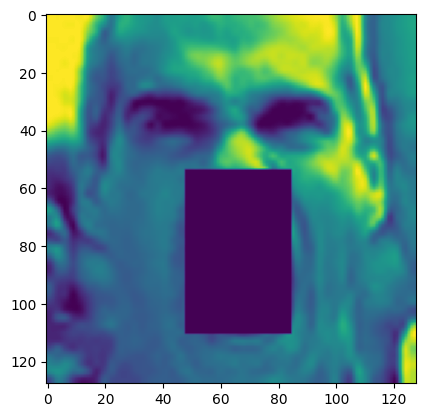

angry


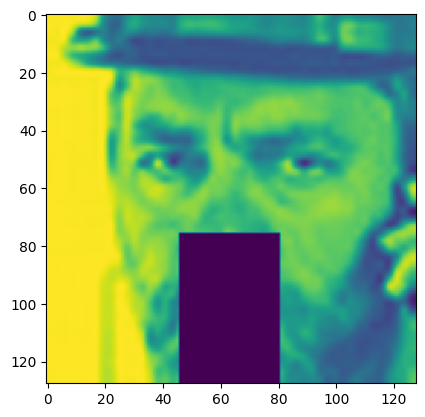

angry


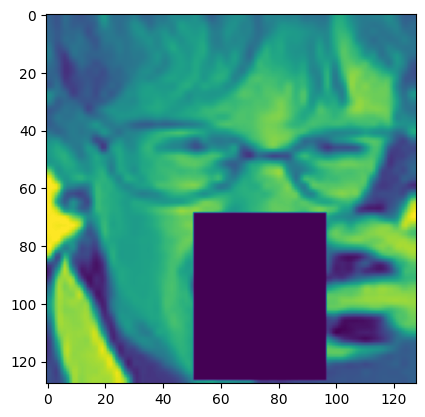

angry


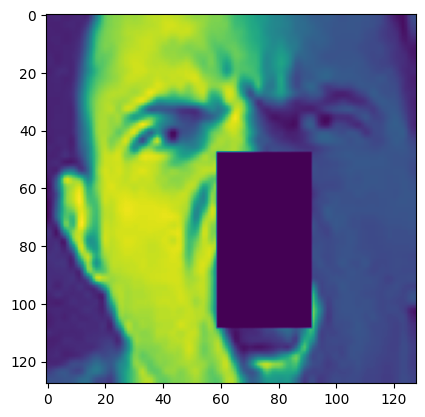

angry


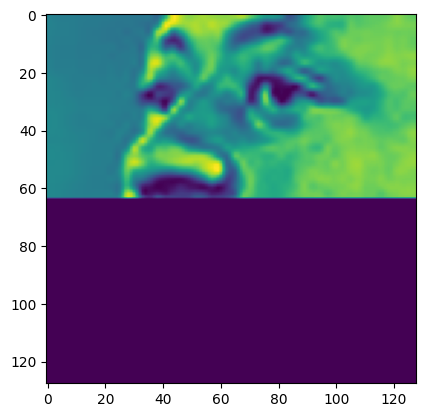

angry


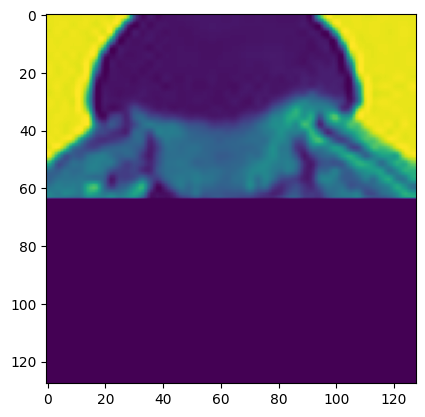

angry


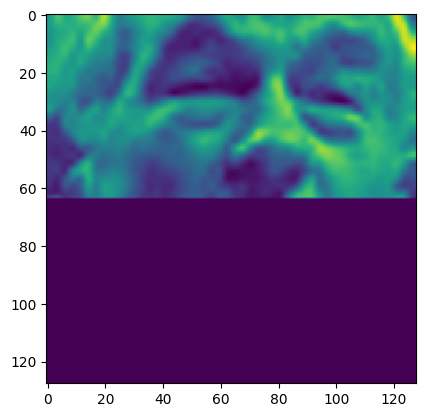

angry


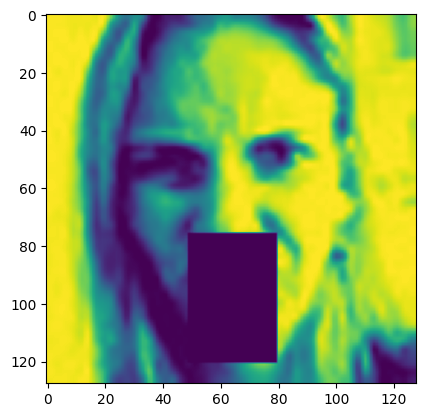

In [13]:
for i in range(0,10):
    img = x_data[i]
    print(emo_types[y_data[i]])
    plt.imshow(img)
    plt.show()

In [12]:
x_data = [normalization(img) for img in x_data]

(27546, 128, 128, 1) (27546,)


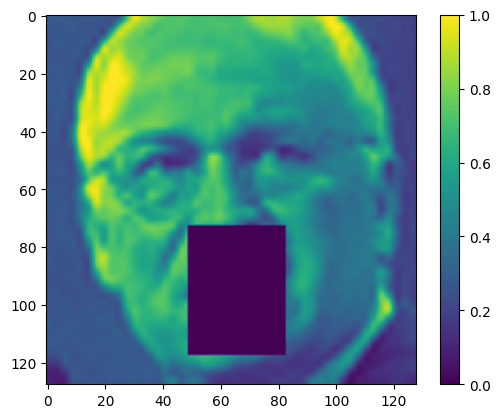

In [14]:
# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)
y_data_ohc = np.eye(len(emo_types))[y_data]


print(x_data.shape, y_data.shape)
plt.imshow(x_data[0,:,:,0])
plt.colorbar()

In [15]:
VGG16_model_bn_bottom = tf.keras.models.Sequential([
    
    # Input layer
    tf.keras.layers.Input(x_data[0].shape),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # convolutional layer with batch normalisation:
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Max pooling layer:
    tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Batch Normalisation layer:
    tf.keras.layers.BatchNormalization(),


    # output layer:
    tf.keras.layers.Dense(7, activation='softmax')
])

In [16]:
VGG16_model_bn_bottom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 5e-4),  # pick an optimizer and learning rate
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=tf.keras.metrics.CategoricalAccuracy())  # pick a metric to monitor

In [17]:
n_epoch = 30
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
hist = VGG16_model_bn_bottom.fit(x_data, y_data_ohc,
              epochs=n_epoch,
              batch_size=32,
              validation_data=(x_test, y_test_ohc),
              callbacks=[callback])

Epoch 1/30
861/861 [==============================] - 155s 154ms/step - loss: 1.8941 - categorical_accuracy: 0.2886 - val_loss: 1.8556 - val_categorical_accuracy: 0.2297
Epoch 2/30
861/861 [==============================] - 127s 147ms/step - loss: 1.6202 - categorical_accuracy: 0.3852 - val_loss: 1.6759 - val_categorical_accuracy: 0.3579
Epoch 3/30
861/861 [==============================] - 127s 147ms/step - loss: 1.5046 - categorical_accuracy: 0.4279 - val_loss: 1.8335 - val_categorical_accuracy: 0.2622
Epoch 4/30
861/861 [==============================] - 127s 147ms/step - loss: 1.3557 - categorical_accuracy: 0.4792 - val_loss: 1.4260 - val_categorical_accuracy: 0.4568
Epoch 5/30
861/861 [==============================] - 127s 147ms/step - loss: 1.3859 - categorical_accuracy: 0.4704 - val_loss: 1.3944 - val_categorical_accuracy: 0.4607
Epoch 6/30
861/861 [==============================] - 126s 147ms/step - loss: 1.3865 - categorical_accuracy: 0.4676 - val_loss: 1.5769 - val_categoric

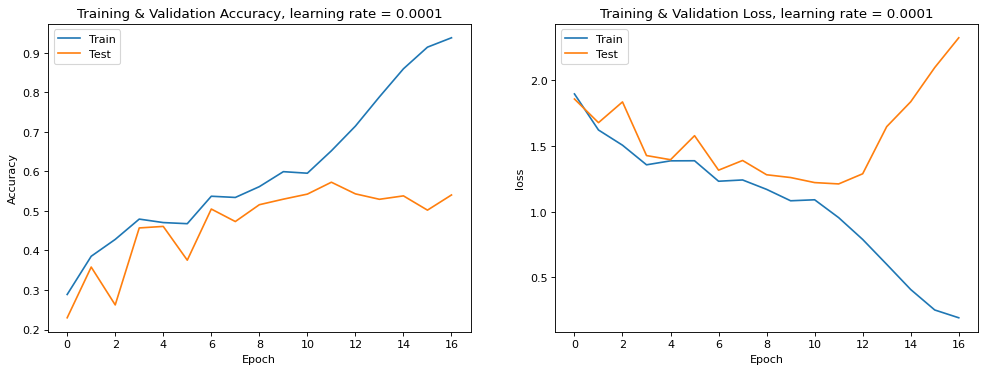

In [19]:
n_epoch = 17
plt.figure(figsize=(15, 5), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(n_epoch),hist.history.get('categorical_accuracy'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_categorical_accuracy'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Training & Validation Accuracy, learning rate = 0.0001")

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(n_epoch),hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epoch),hist.history.get('val_loss'), label="Test")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(loc='best')
plt.title("Training & Validation Loss, learning rate = 0.0001")
plt.show()

In [23]:
VGG16_model_bn_bottom.save_weights('/content/gdrive/MyDrive/ML Final project/VGG16_model_bn_bottom')

## Test Data

In [20]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [21]:
# Evaluate the model
# loss, acc = VGG16_model_bn_forehead.evaluate(x_test, y_test, verbose=2)
# print("VGG 16 model, accuracy: {:5.2f}%".format(100 * acc))
y_pred = VGG16_model_bn_bottom.predict(x_test, verbose=2)

203/203 - 8s - 8s/epoch - 38ms/step


In [22]:
y_pred = np.argmax(y_pred,axis = 1)
print(classification_report(y_test,y_pred,digits = 5))
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

              precision    recall  f1-score   support

           0    0.43066   0.62950   0.51144       888
           1    0.77778   0.08434   0.15217        83
           2    0.40942   0.31332   0.35498       916
           3    0.80259   0.77740   0.78979      1752
           4    0.52475   0.58340   0.55253      1181
           5    0.47213   0.41268   0.44041      1088
           6    0.69557   0.62241   0.65696       580

    accuracy                        0.57244      6488
   macro avg    0.58756   0.48901   0.49404      6488
weighted avg    0.58030   0.57244   0.56850      6488

[0.6295045  0.08433735 0.31331878 0.77739726 0.5834039  0.41268382
 0.62241379]
